In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



## Hierarchal

In [2]:
df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_13300\2521229253.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.columns =df.columns.str.lower().str.replace(" " , "")


In [4]:
print(df.isnull().sum())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


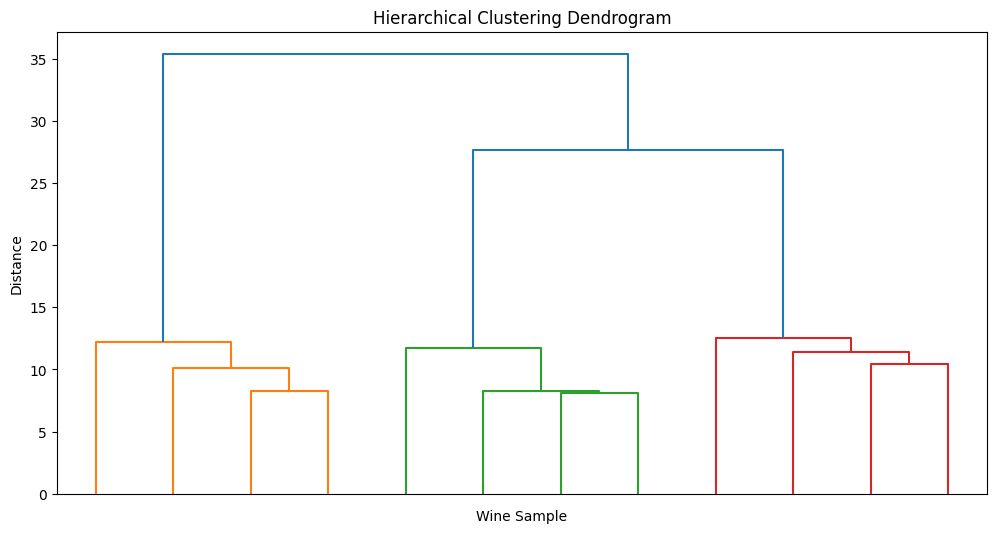

In [5]:
plt.figure(figsize=(12, 6))
Z = linkage(data_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=45, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Sample')
plt.ylabel('Distance')
plt.show()

In [6]:
n_clusters = 4  
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hc.fit_predict(data_scaled)

df['Cluster'] = clusters

In [7]:
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
Cluster,,,,,,,,,,,,,
0,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
1,12.232667,1.764000,2.058667,18.396667,96.100000,2.403667,2.167667,0.275667,1.821333,3.107000,1.058667,2.937333,539.300000
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875
3,12.173214,2.126429,2.382857,22.150000,88.750000,2.112143,2.002857,0.440714,1.542143,2.668571,1.061429,2.781786,460.857143


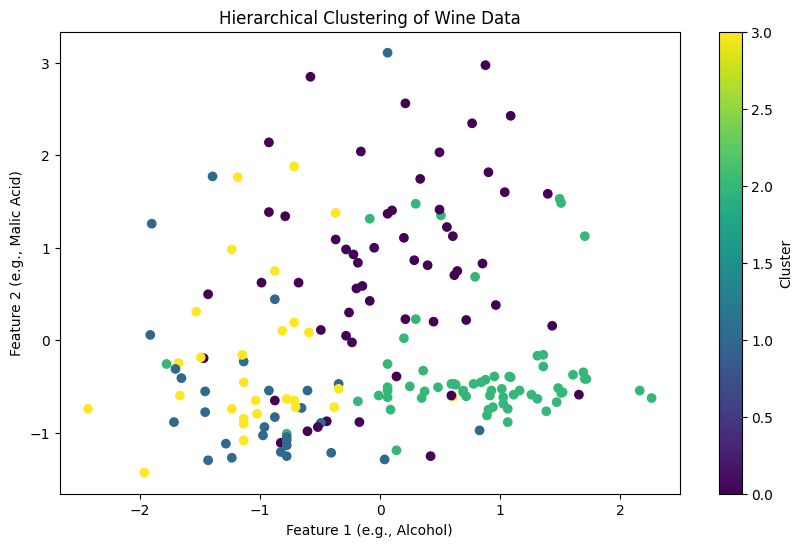

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering of Wine Data')
plt.xlabel('Feature 1 (e.g., Alcohol)')
plt.ylabel('Feature 2 (e.g., Malic Acid)')
plt.colorbar(label='Cluster')


## K-Mean

In [9]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

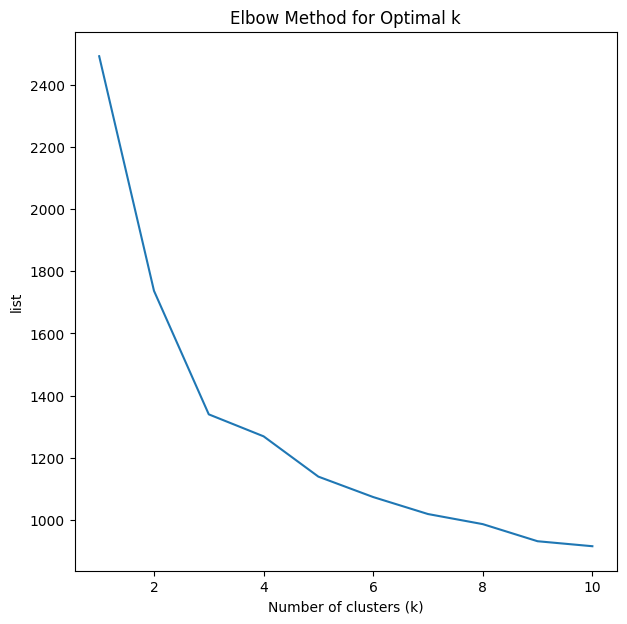

In [11]:
# Elbow method to find the optimal number of clusters
list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    list.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), list )
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('list')
plt.show()


In [18]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

In [19]:

cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
Cluster,,,,,,,,,,,,,
0,12.245593,1.923390,2.228136,20.244068,90.118644,2.292373,2.139831,0.355763,1.665593,2.978983,1.062881,2.863559,491.830508
1,12.912581,3.262258,2.355806,20.361290,95.193548,1.677097,0.738065,0.513226,0.945161,5.507097,0.773097,1.819677,617.322581
2,13.653492,1.985079,2.454921,17.452381,108.650794,2.831746,2.975873,0.289683,1.931270,5.412222,1.068889,3.161905,1094.158730
3,13.246400,3.048000,2.483600,21.800000,105.640000,1.715600,0.984000,0.370400,1.357600,8.515600,0.656400,1.612800,634.400000


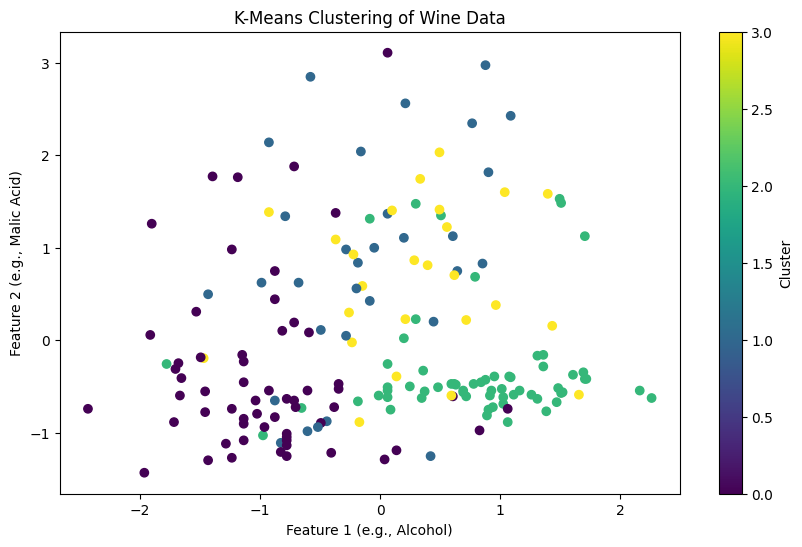

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Wine Data')
plt.xlabel('Feature 1 (e.g., Alcohol)')
plt.ylabel('Feature 2 (e.g., Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()